In [ ]:
pip install pandas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from scipy import stats
import math as math
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression


In [ ]:
df = pd.read_csv(r'/content/CPU_Data - Data.csv')

In [ ]:
df.head()

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP
0,125,256,6000,256,16,128,198
1,29,8000,32000,32,8,32,269
2,29,8000,32000,32,8,32,220
3,29,8000,32000,32,8,32,172
4,29,8000,16000,32,8,16,132


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   MYCT    209 non-null    int64
 1   MMIN    209 non-null    int64
 2   MMAX    209 non-null    int64
 3   CACH    209 non-null    int64
 4   CHMIN   209 non-null    int64
 5   CHMAX   209 non-null    int64
 6   PRP     209 non-null    int64
dtypes: int64(7)
memory usage: 11.6 KB


In [ ]:
df.describe()

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP
count,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000
mean,203.822967,2867.980861,11796.153110,25.205742,4.698565,18.267943,105.622010
std,260.262926,3878.742758,11726.564377,40.628722,6.816274,25.997318,160.830733
min,17.000000,64.000000,64.000000,0.000000,0.000000,0.000000,6.000000
25%,50.000000,768.000000,4000.000000,0.000000,1.000000,5.000000,27.000000
50%,110.000000,2000.000000,8000.000000,8.000000,2.000000,8.000000,50.000000
75%,225.000000,4000.000000,16000.000000,32.000000,6.000000,24.000000,113.000000
max,1500.000000,32000.000000,64000.000000,256.000000,52.000000,176.000000,1150.000000


In [ ]:
df.corr()

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP
MYCT,1.000000,-0.335642,-0.378561,-0.321000,-0.301090,-0.250502,-0.307099
MMIN,-0.335642,1.000000,0.758157,0.534729,0.517189,0.266907,0.794931
MMAX,-0.378561,0.758157,1.000000,0.537990,0.560513,0.527246,0.863004
CACH,-0.321000,0.534729,0.537990,1.000000,0.582245,0.487846,0.662641
CHMIN,-0.301090,0.517189,0.560513,0.582245,1.000000,0.548281,0.608903
CHMAX,-0.250502,0.266907,0.527246,0.487846,0.548281,1.000000,0.605209
PRP,-0.307099,0.794931,0.863004,0.662641,0.608903,0.605209,1.000000


In [ ]:
x = df.iloc[:,0:6]
y =df.PRP

In [ ]:
x

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX
0,125,256,6000,256,16,128
1,29,8000,32000,32,8,32
2,29,8000,32000,32,8,32
3,29,8000,32000,32,8,32
4,29,8000,16000,32,8,16
...,...,...,...,...,...,...
204,124,1000,8000,0,1,8
205,98,1000,8000,32,2,8
206,125,2000,8000,0,2,14
207,480,512,8000,32,0,0


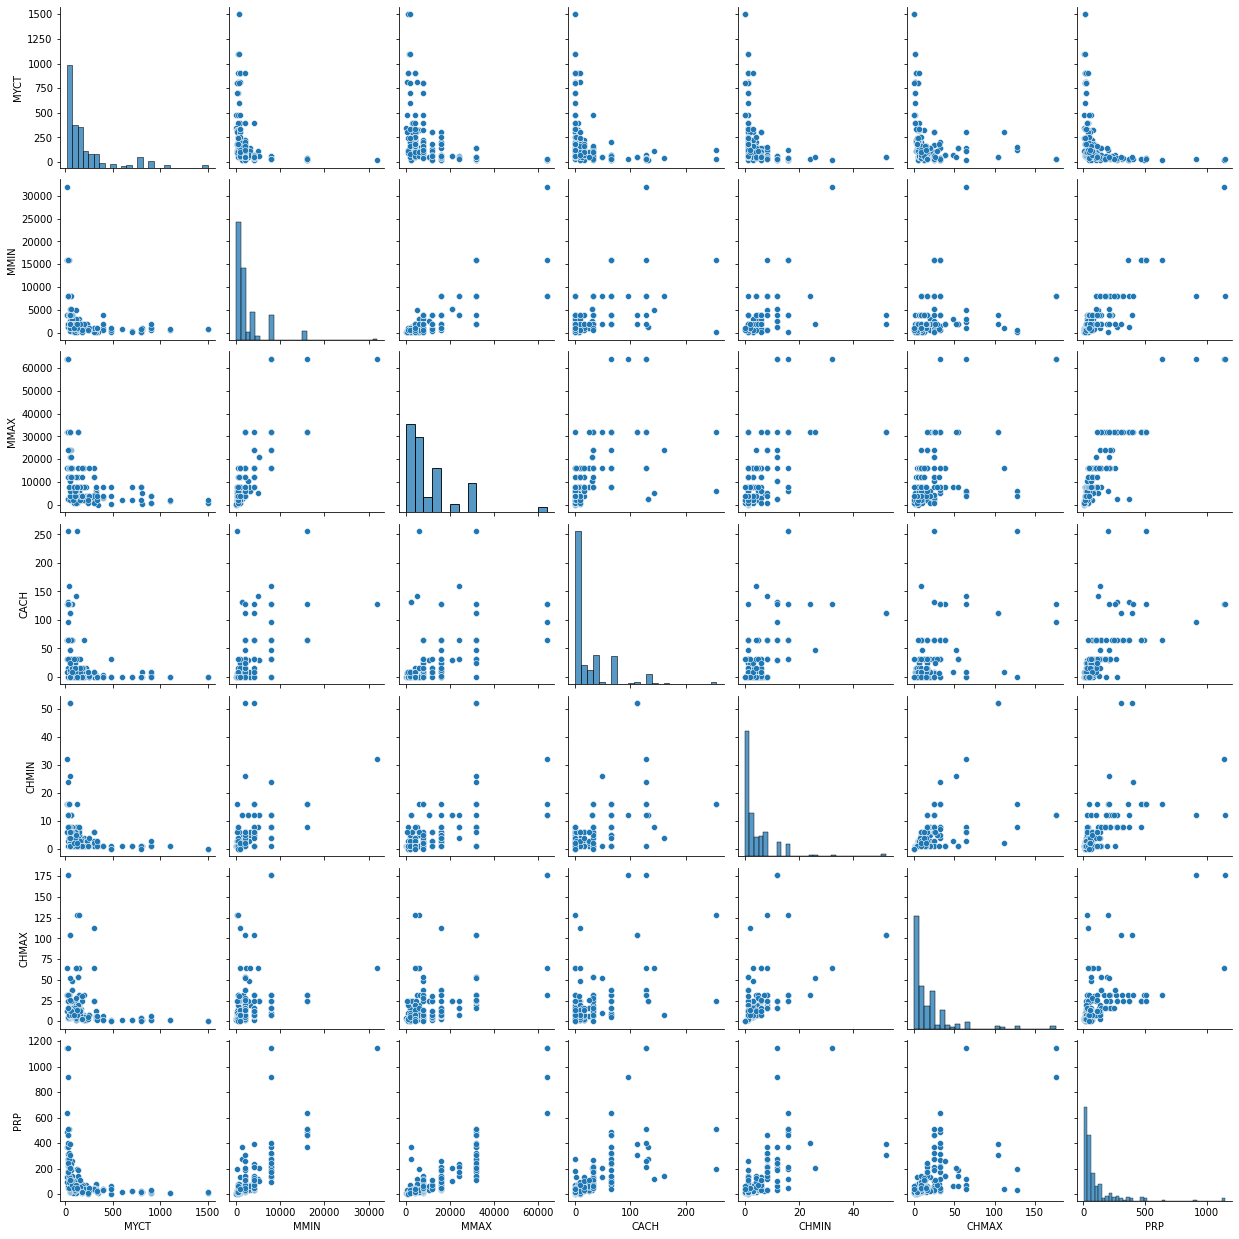

In [ ]:
sns.pairplot(df)
plt.show()

In [ ]:
model = ols("y~x",df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     215.5
Date:                Sat, 29 Jan 2022   Prob (F-statistic):           6.24e-85
Time:                        05:49:09   Log-Likelihood:                -1148.7
No. Observations:                 209   AIC:                             2311.
Df Residuals:                     202   BIC:                             2335.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -55.8939      8.045     -6.948      0.000     -71.757     -40.031
x[0]           0.0489      0.018      2.789      0.006       0.014       0.083
x[1]           0.0153      0.002      8.371      0.000       0.012       0.019
x[2]           0.0056      0.001      8.681      0.000       0.004       0.007
x[3]           0.6414      0.140      4.596      0.000       0.366       0.917
x[4]          -0.2704      0.856     -0.316      0.752      -1.958       1.417
x[5]           1.4825      0.220      6.737      0.000       1.049       1.916
==============================================================================
Omnibus:                       99.727   Durbin-Watson:                   1.202
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1140.969
Skew:                           1.495   Prob(JB):                    1.74e-248
Kurtosis:                      14.049   Cond. No.                     3.32e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.32e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
anv = anova_lm(model)
anv

,df,sum_sq,mean_sq,F,PR(>F)
x,6.0,4.653317e+06,775552.837259,215.514291,6.235514e-85
Residual,202.0,7.269201e+05,3598.614432,NaN,NaN


In [ ]:
pred  = model.predict()
pred = pd.DataFrame(pred,columns = ['Predicted'])


In [ ]:
res = model.resid
res = pd.DataFrame(res,columns = ['Residuals'])


In [ ]:

df['Predicted'] = pred
df['Residuals'] = res

In [ ]:
df.head()

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,Predicted,Residuals
0,125,256,6000,256,16,128,198,337.185648,-139.185648
1,29,8000,32000,32,8,32,269,311.949000,-42.949000
2,29,8000,32000,32,8,32,220,311.949000,-91.949000
3,29,8000,32000,32,8,32,172,311.949000,-139.949000
4,29,8000,16000,32,8,16,132,199.087209,-67.087209


ValueError: ignored

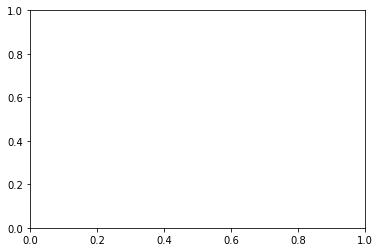

In [ ]:
plt.scatter(y,pred)

plt.show()

In [ ]:
stats.mstats.normaltest(res)

NormaltestResult(statistic=masked_array(data=[99.72738283280226],
             mask=[False],
       fill_value=1e+20), pvalue=array([2.21041577e-22]))

In [ ]:
res_sq = res**2
mse = res_sq.mean()
rmse = math.sqrt(mse)
print('mse: ',mse)
print('rmse: ',rmse)


mse:  Residuals    3478.086676
dtype: float64
rmse:  58.975305642407285


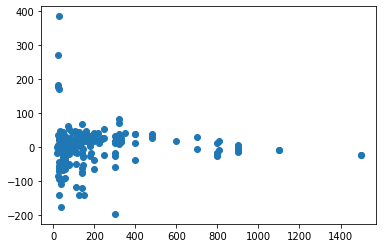

In [ ]:
plt.scatter(df['MYCT'],res)
plt.show()

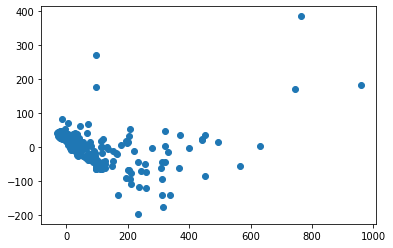

In [ ]:
plt.scatter(pred,res)
plt.show()

In [ ]:
lm_model = LinearRegression()
lm_model = lm_model.fit(x,y)
lm_model.intercept_


-55.89393360702407

In [ ]:
lm_model.coef_

array([ 0.0488549 ,  0.01529257,  0.00557139,  0.64140143, -0.27035755,
        1.48247217])

In [ ]:
rsq = lm_model.score(x,y)
pred = lm_model.predict(x)

In [ ]:
mse = mean_squared_error(y,pred)
rmse = math.sqrt(mse)
print('mse: ',mse)
print('rmse: ',rmse)

mse:  3478.0866756153564
rmse:  58.975305642407285


In [ ]:
res = y-pred
res

0     -139.185648
1      -42.949000
2      -91.949000
3     -139.949000
4      -67.087209
          ...    
204     20.382816
205      5.398556
206      6.416914
207     26.517821
208     39.865451
Name: PRP, Length: 209, dtype: float64

In [ ]:
output = pd.DataFrame({'PRP':y,'Prediction':pred,'Residual':res})
output.head()

,PRP,Prediction,Residual
0,198,337.185648,-139.185648
1,269,311.949000,-42.949000
2,220,311.949000,-91.949000
3,172,311.949000,-139.949000
4,132,199.087209,-67.087209


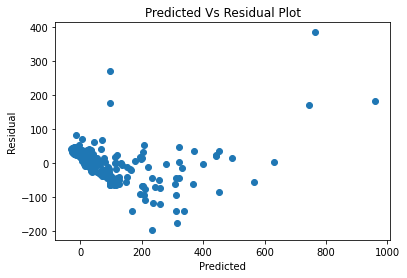

In [ ]:
plt.scatter(pred,res)
plt.title('Predicted Vs Residual Plot')
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.show()

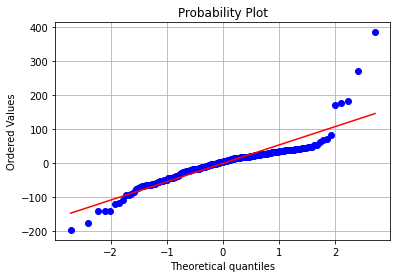

In [ ]:
norm_test = stats.normaltest(res)
w = norm_test[0]
p_value = norm_test[1]
stats.probplot(res, plot= plt)
plt.grid()
plt.show()

In [ ]:
print('w:',w)
print('p_value:',p_value)

w: 99.72738283280293
p_value: 2.2104157709076304e-22


In [ ]:
myscore = cross_val_score(lm_model, x, y, scoring='neg_mean_squared_error', cv = 10)
cv_mse = -1*myscore.mean()
rmse = math.sqrt(cv_mse)

In [ ]:
print('mse:',mse)
print('rmse:',rmse)

mse: 3478.0866756153564
rmse: 84.37752965440585


**2. heart data**


In [ ]:
heart = pd.read_csv(r'/content/Heart_Disease_Data - heart_Data.csv')

In [ ]:
heart.head()

,Age,Sex,CP,RestBP,Cholesteral,FBP,RestECG,Max_HR,ExAngina,Oldpeak,Slope,CA,Thal,Result
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          303 non-null    int64  
 1   Sex          303 non-null    int64  
 2   CP           303 non-null    int64  
 3   RestBP       303 non-null    int64  
 4   Cholesteral  303 non-null    int64  
 5   FBP          303 non-null    int64  
 6   RestECG      303 non-null    int64  
 7   Max_HR       303 non-null    int64  
 8   ExAngina     303 non-null    int64  
 9   Oldpeak      303 non-null    float64
 10  Slope        303 non-null    int64  
 11  CA           303 non-null    int64  
 12  Thal         303 non-null    int64  
 13  Result       303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
heart.describe()

,Age,Sex,CP,RestBP,Cholesteral,FBP,RestECG,Max_HR,ExAngina,Oldpeak,Slope,CA,Thal,Result
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
from sklearn.linear_model import LogisticRegression
import statsmodels.api as mysm

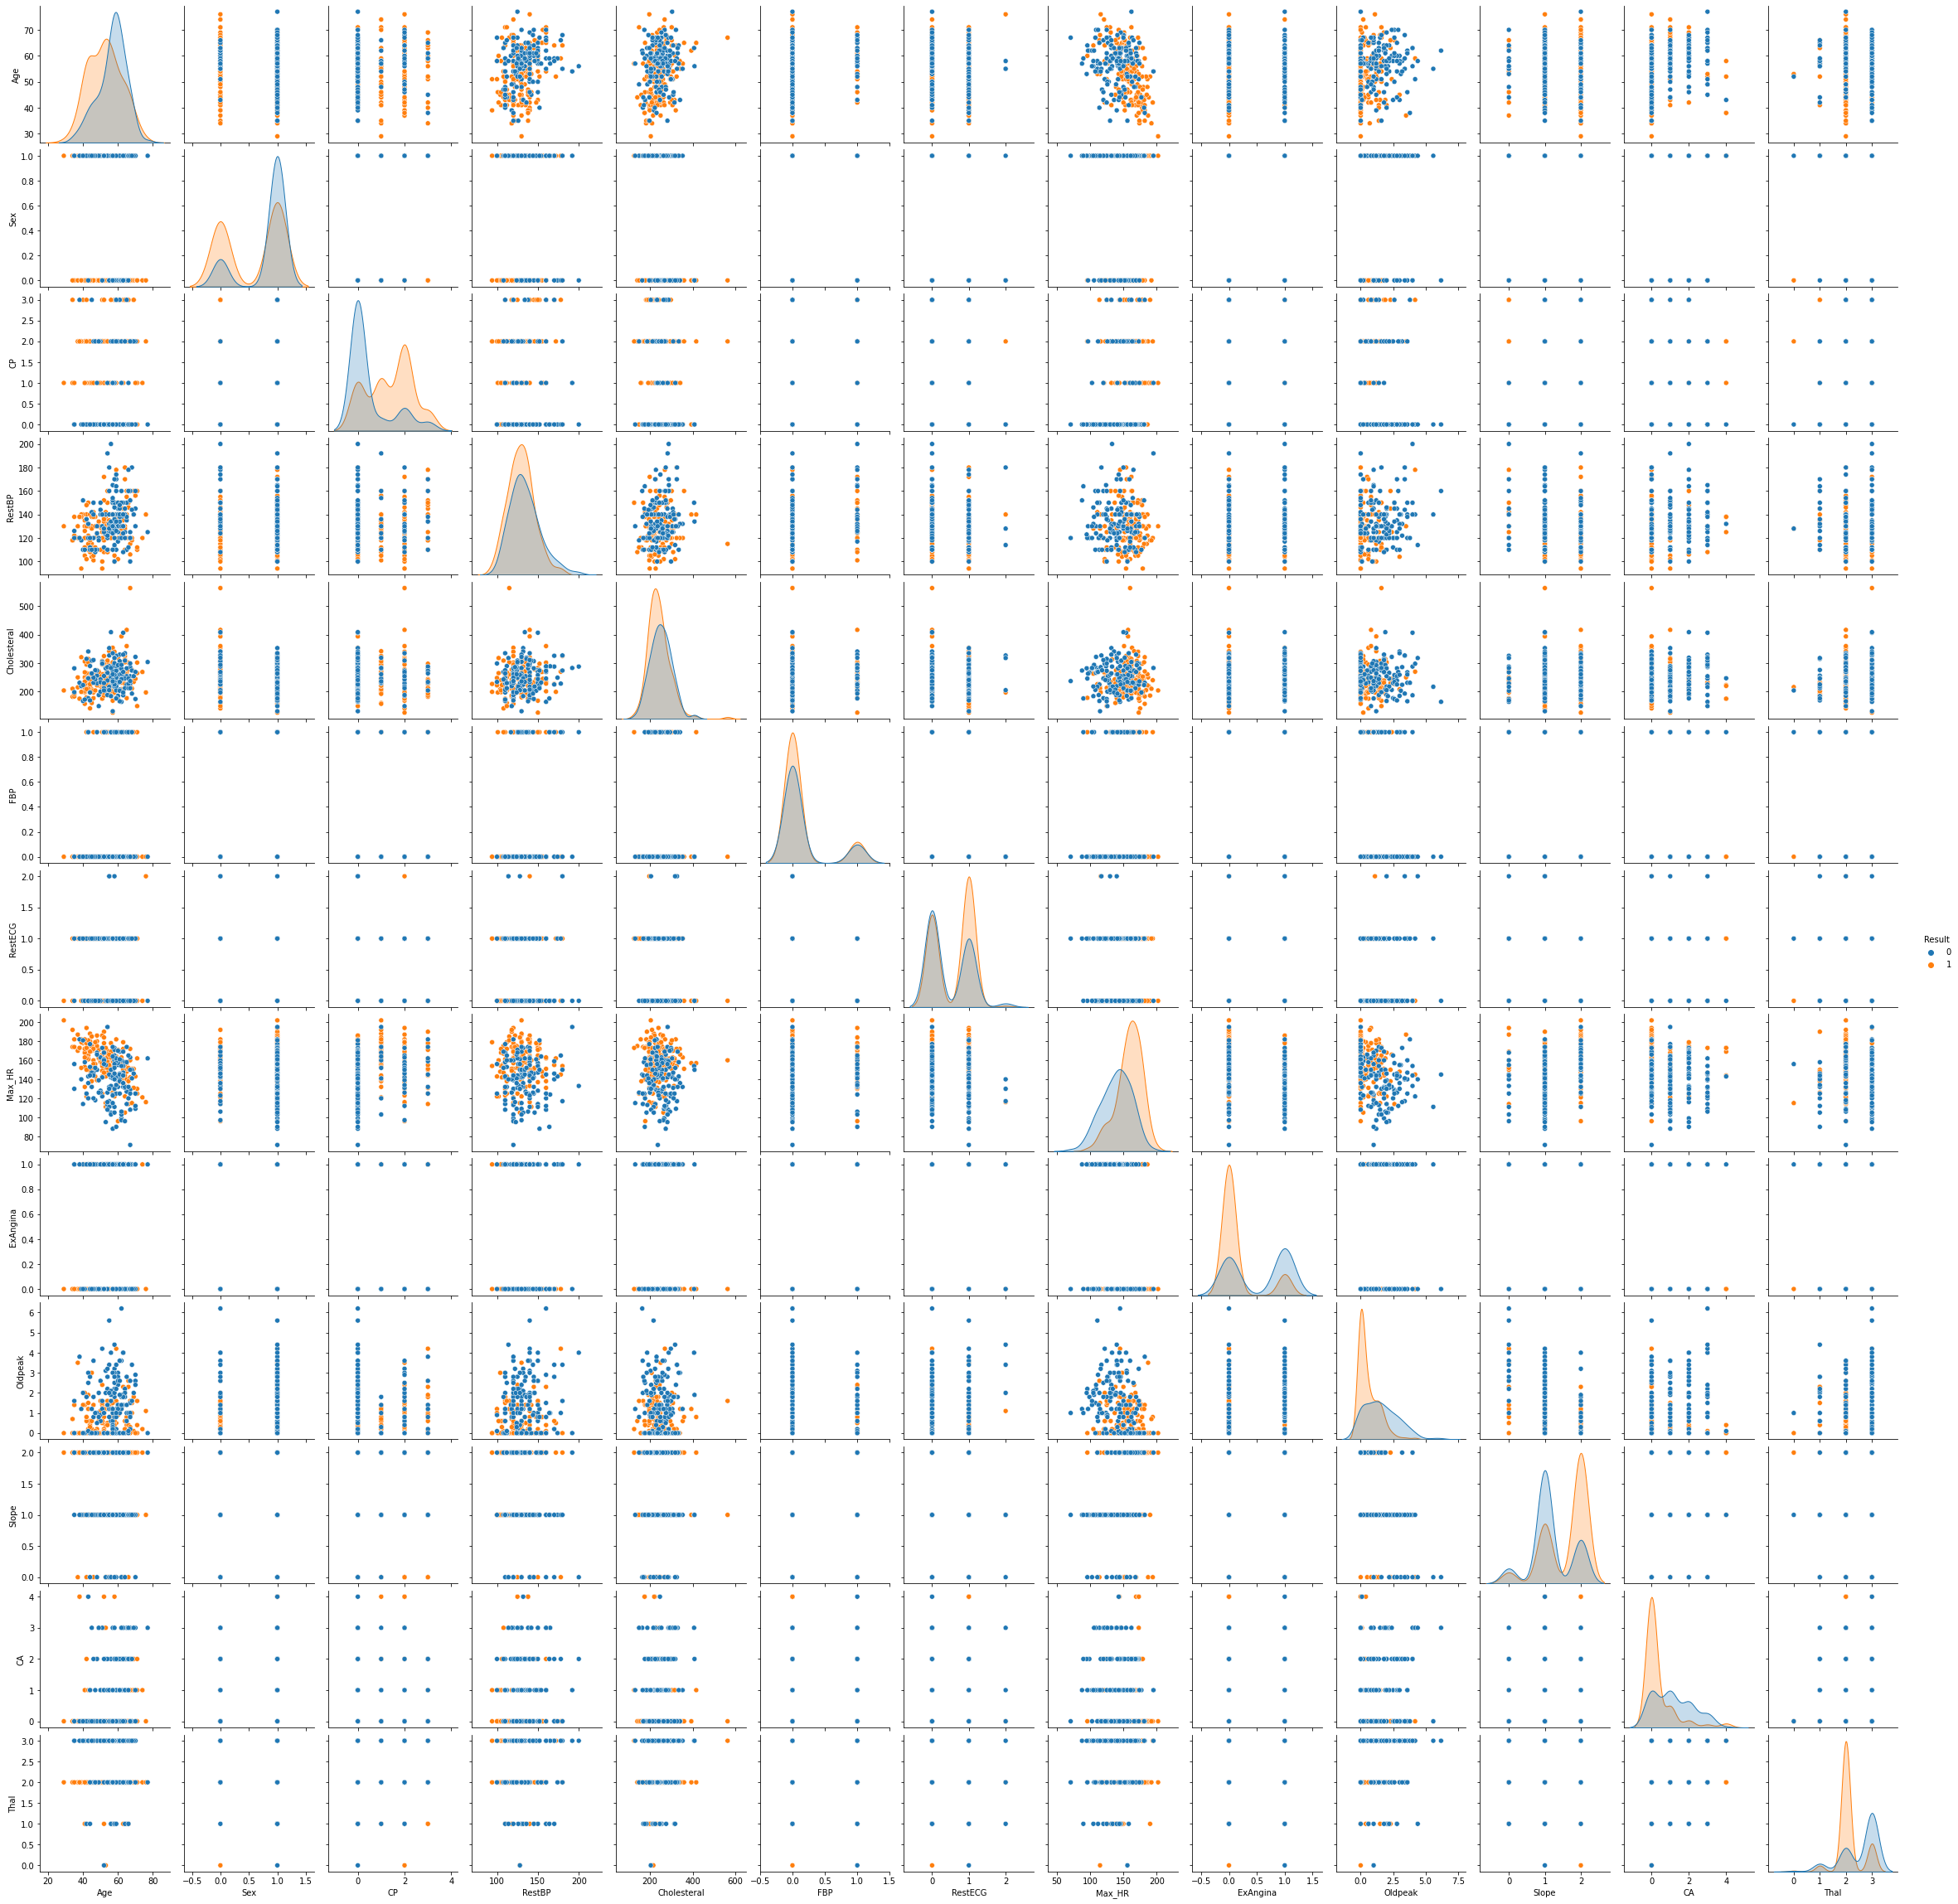

In [ ]:
sns.pairplot(heart, hue= "Result")
plt.show()

In [ ]:
x = heart.iloc[:,0:13]
y = heart.Result

In [ ]:
x['intercept_'] =1

In [ ]:
log_model = mysm.Logit(y,x)
outcome = log_model.fit()
outcome.summary()

Optimization terminated successfully.
         Current function value: 0.348904
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Result   No. Observations:                  303
Model:                          Logit   Df Residuals:                      289
Method:                           MLE   Df Model:                           13
Date:                Sat, 29 Jan 2022   Pseudo R-squ.:                  0.4937
Time:                        05:51:04   Log-Likelihood:                -105.72
converged:                       True   LL-Null:                       -208.82
Covariance Type:            nonrobust   LLR p-value:                 7.262e-37
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Age            -0.0049      0.023     -0.212      0.832      -0.050       0.041
Sex            -1.7582      0.469     -3.751      0.000      -2.677      -0.839
CP              0.8599      0.185      4.638      0.000       0.496       1.223
RestBP         -0.0195      0.010     -1.884      0.060      -0.040       0.001
Cholesteral    -0.0046      0.004     -1.224      0.221      -0.012       0.003
FBP             0.0349      0.529      0.066      0.947      -1.003       1.073
RestECG         0.4663      0.348      1.339      0.181      -0.216       1.149
Max_HR          0.0232      0.010      2.219      0.026       0.003       0.044
ExAngina       -0.9800      0.410     -2.391      0.017      -1.783      -0.177
Oldpeak        -0.5403      0.214     -2.526      0.012      -0.959      -0.121
Slope           0.5793      0.350      1.656      0.098      -0.106       1.265
CA             -0.7733      0.191     -4.051      0.000      -1.147      -0.399
Thal           -0.9004      0.290     -3.104      0.002      -1.469      -0.332
intercept_      3.4505      2.571      1.342      0.180      -1.590       8.490
===============================================================================
"""

In [ ]:
predic =  outcome.predict(x)
predclass = [1 if i>=0.5 else 0 for i in predic]
pred_output = pd.DataFrame(predclass)
pred_output

,0
0,1
1,1
2,1
3,1
4,1
...,...
298,0
299,1
300,0
301,0


In [ ]:
predic

0      0.807387
1      0.658309
2      0.961807
3      0.914563
4      0.817220
         ...   
298    0.363377
299    0.809373
300    0.016766
301    0.042528
302    0.920534
Length: 303, dtype: float64

In [ ]:
actual = heart['Result']

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
matrix = confusion_matrix(actual,pred_output,labels = [1,0])
print('Confusion matrix : \n',matrix)

Confusion matrix : 
 [[152  13]
 [ 32 106]]


In [ ]:
tp, fn, fp, tn = confusion_matrix(actual,pred_output,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

matrix = classification_report(actual,pred_output,labels=[1,0])
print('Classification report : \n',matrix)

Outcome values : 
 152 13 32 106
Classification report : 
               precision    recall  f1-score   support

           1       0.83      0.92      0.87       165
           0       0.89      0.77      0.82       138

    accuracy                           0.85       303
   macro avg       0.86      0.84      0.85       303
weighted avg       0.86      0.85      0.85       303



In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [ ]:
log_reg = LogisticRegression(C=1e8)
log_reg = log_reg.fit(x,y)
log_reg.intercept_


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


array([0.08472776])

In [ ]:
log_reg.coef_

array([[ 0.01043384, -1.55916696,  0.87912139, -0.01507356, -0.00312788,
        -0.10904536,  0.6400084 ,  0.0301487 , -0.90442144, -0.50520269,
         0.61118465, -0.72477292, -0.87563818,  0.08472776]])

In [ ]:
accuracy = log_reg.score(x,y)
ypred = log_reg.predict(x)
ypredprob = log_reg.predict_proba(x)
myresult = [y, ypred]
myresult =pd.DataFrame(myresult)
ypredprob = pd.DataFrame(ypredprob)
accuracy = accuracy_score(y, ypred)
accuracy

0.8481848184818482

In [ ]:
table = pd.crosstab(y,ypred)
table

col_0,0,1
Result,,
0,105,33
1,13,152


In [ ]:
myscore = cross_val_score(log_reg, x, y, scoring="accuracy", cv = 5)
cv_accuracy = myscore.mean()
round(cv_accuracy*100,2)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


82.49